# 🏨 Airbnb Hotel Booking Analysis

## **Problem Statement**
The hospitality industry has undergone a significant transformation with the rise of online platforms facilitating short-term lodging and tourism. Leading this evolution is Airbnb, a pioneering American company that has reshaped travel accommodation through its innovative online marketplace. Established in 2008 in San Francisco, California, Airbnb provides a diverse range of lodging options, offering guests a unique and personalized experience. Unlike traditional hospitality providers, Airbnb operates on a commission-based model, facilitating transactions between hosts and guests without owning the properties listed on its platform.

This research analysis delves into the New York City Airbnb dataset to extract meaningful insights. Through rigorous data cleaning, exploratory analysis, and visualization techniques, the study aims to illuminate the dynamics of the city’s lodging market. By discerning factors influencing listing availability, pricing strategies, and overall customer satisfaction, the research contributes to a deeper understanding of Airbnb’s operations in one of the world’s most dynamic urban environments. These insights hold significance for stakeholders and enthusiasts seeking to navigate the evolving landscape of short-term accommodation.

---

## **Research Questions**
1. What are the different property types in the dataset?  
2. Which neighborhood group has the highest number of listings?  
3. Which neighborhood group has the highest average prices for Airbnb listings?  
4. Is there a relationship between the construction year of property and price?  
5. Who are the top 10 hosts by calculated host listing count?  
6. Are hosts with verified identities more likely to receive positive reviews?  
7. Is there a correlation between the price of a listing and its service fee?  
8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?  
9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
10. Does having a higher minimum nights requirement lead to a lower reviews per month? 
11. Which room type is most available throughout the year? (Highest availability 365)

---

# DATA WRANGLING
Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.



In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [6]:
df=pd.read_csv("a.csv")
df.head()

C:\Users\namit\AppData\Local\Temp\ipykernel_22868\3097079041.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("a.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [8]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [9]:
# Neighbourhood group was 'brookln' instead of 'Brooklyn'
df[df['neighbourhood group'] == 'brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,$116,4.0,167.0,6/24/2019,1.34,4.0,3.0,47.0,NaN,NaN


## Problems Identified within the Data
- 541 duplicated Records where found in the Data.

- Insufficient information were recorded for the house_rules and Licence columns.

- Dollar signs and commas recorded along with the values for price and service fee.

- The currency for price and service fee were not added to the column's titles.

- Missing values in some records

- Columns like the price, service fee, id, host id, last review, Construction  year are assigned wrong datatypes.

- In the neighbourhood group column the spelling of 'Brooklyn' was misspelt in some records.

- Some outliers were identified in the availability 365 column.

## CLEAN THE DATA
Steps to be Taken for Data Cleaning

- Drop duplicated records.

- Drop house_rules and license columns with insufficient data.

- Remove all dollar signs in the price and service fee columns.

- Remove all commas from the price and service fee columns.

- Rename the price and service fee columns to include a dollar signs.

- Drop all records with missing values.

- Change all mismatched data types to the appropriate ones.

- Correct the Spelling of 'brookln' to 'Brooklyn'.

- Get rid of outliers in the 'availability 365' column data.

In [10]:
#Drop duplicate records
df.drop_duplicates(inplace = True)

#drop house_rules and license columns with insufficient data
df.drop(['house_rules', 'license'], axis = 1, inplace= True)

#Remove all dollar signs in the price and service fee columns
df['price'] = df['price'].str.replace('$', '', regex= False)
df['service fee'] = df['service fee'].str.replace('$', '', regex= False)

#Remove all commas in the price and service fee columns
df['price'] = df['price'].str.replace(',', '', regex= False)
df['service fee'] = df['service fee'].str.replace(',', '', regex= False)

#Rename the price and service fee columns to include a dollar sign
df.rename(columns = {
    'price':'price_$',
    'service fee': 'service_fee_$'
}, inplace = True)

#Drop all records with missing values
df.dropna(inplace = True)

#Change all mismatched data types to the appropriate once.
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'])
df['Construction year'] = df['Construction year'].astype(int)

#Correct the Spelling of 'brookln' to 'Brooklyn'
df.loc[df['neighbourhood group'] == 'brookln', 'neighbourhood group'] = 'Brooklyn'

#Get rid of outliers in the 'availability 365' column data
df = df.drop(df[df['availability 365'] > 500].index)

In [11]:
df.duplicated().value_counts()

False    83411
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83411 entries, 0 to 102040
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              83411 non-null  object        
 1   NAME                            83411 non-null  object        
 2   host id                         83411 non-null  object        
 3   host_identity_verified          83411 non-null  object        
 4   host name                       83411 non-null  object        
 5   neighbourhood group             83411 non-null  object        
 6   neighbourhood                   83411 non-null  object        
 7   lat                             83411 non-null  float64       
 8   long                            83411 non-null  float64       
 9   country                         83411 non-null  object        
 10  country code                    83411 non-null  object        
 11  instan

## EXPLORATORY DATA ANALYSIS (EDA)
Exploratory Data Analysis (EDA) is a vital phase in data analysis, involving the examination and visualization of data to uncover patterns, trends, and insights. In the context of an Airbnb data analysis project, EDA allows researchers to gain a comprehensive understanding of the dataset's characteristics, distribution, and relationships between variables. Through techniques such as summary statistics, data visualization, and correlation analysis, EDA sets the stage for further investigation and hypothesis testing, guiding subsequent analytical decisions.

Summary Statistics

In [11]:
df.describe()

,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411.000000,83411,83411.000000,83411.000000,83411.000000,83411.000000
mean,40.727353,-73.948500,2012.488509,626.212730,125.243709,7.405366,32.276642,2019-06-08 22:01:01.027922176,1.377584,3.278776,7.032682,141.742612
min,40.504560,-74.249840,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687650,-73.982110,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-26 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721320,-73.953720,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762595,-73.930815,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,426.000000
std,0.056324,0.050347,5.760870,331.787179,66.360979,28.102221,51.957777,NaN,1.751041,1.283599,29.551590,133.368399


## 1. What are the different property types in the Dataset?
This question was already partially answered in the previous step. Here is the code to calculate the counts and plot them as a bar chart.

         Room Type  Count
0  Entire home/apt  44163
1     Private room  37494
2      Shared room   1646
3       Hotel room    108


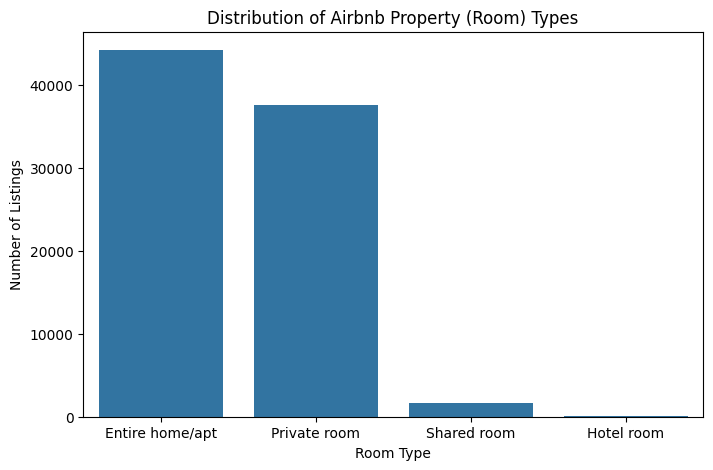

In [17]:
# Calculate the count of each room type (property type)
property_types = df['room type'].value_counts().to_frame().reset_index()
property_types.columns = ['Room Type', 'Count']
print(property_types)

# Plotting the room type counts as a bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Room Type', y='Count', data=property_types)
plt.title('Distribution of Airbnb Property (Room) Types')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.show()

## 2. Which neighborhood group has the highest number of listings?

  Neighbourhood Group  Number of Listings
0            Brooklyn               34636
1           Manhattan               34566
2              Queens               11126
3               Bronx                2267
4       Staten Island                 816


C:\Users\khush\AppData\Local\Temp\ipykernel_15796\1948661288.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighbourhood Group', y='Number of Listings', data=listings_by_group, palette='viridis')


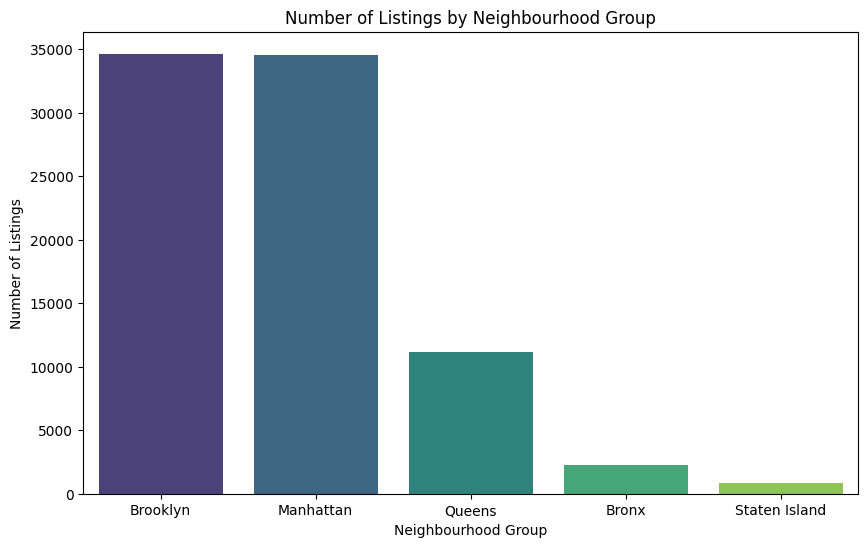


The neighborhood group with the highest number of listings is: Brooklyn with 34636 listings.


In [18]:
# Calculate the number of listings per neighbourhood group
listings_by_group = df['neighbourhood group'].value_counts().to_frame().reset_index()
listings_by_group.columns = ['Neighbourhood Group', 'Number of Listings']
print(listings_by_group)

# Plotting the number of listings per neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighbourhood Group', y='Number of Listings', data=listings_by_group, palette='viridis')
plt.title('Number of Listings by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.show()

# Print the top neighbourhood group
top_group = listings_by_group.iloc[0]
print(f"\nThe neighborhood group with the highest number of listings is: {top_group['Neighbourhood Group']} with {top_group['Number of Listings']} listings.")

##  3. Which neighborhoods group have the highest average prices for Airbnb listings?

  Neighbourhood Group  Average Price ($)
0              Queens         630.457127
1               Bronx         630.201147
2            Brooklyn         627.436684
3           Manhattan         623.454869
4       Staten Island         622.132353


C:\Users\khush\AppData\Local\Temp\ipykernel_15796\1907767654.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Neighbourhood Group', y='Average Price ($)', data=avg_price_by_group, palette='magma')


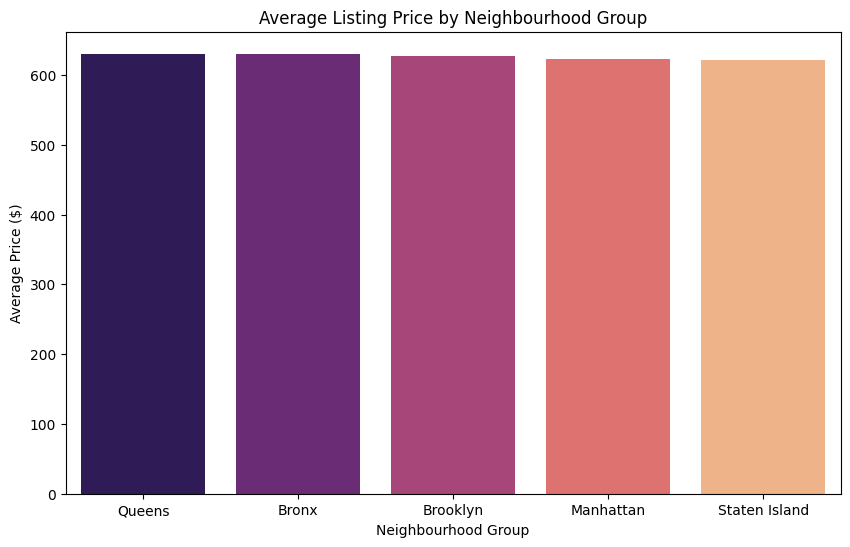

In [20]:
# Calculate the average price for each neighbourhood group
avg_price_by_group = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending=False).to_frame().reset_index()
avg_price_by_group.columns = ['Neighbourhood Group', 'Average Price ($)']
print(avg_price_by_group)

# Plotting the average price per neighbourhood group
plt.figure(figsize=(10, 6))
sns.barplot(x='Neighbourhood Group', y='Average Price ($)', data=avg_price_by_group, palette='magma')
plt.title('Average Listing Price by Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price ($)')
plt.show()

## 4. Is there a relationship between the construction year of property and price?

   Construction Year  Median Price ($)
0               2003             627.0
1               2004             642.5
2               2005             623.0
3               2006             630.0
4               2007             633.0


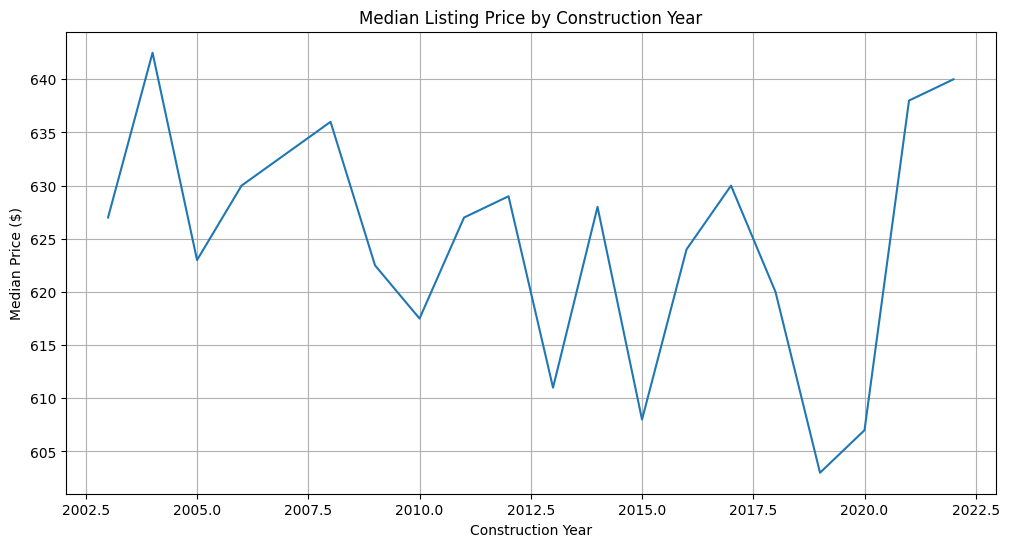

In [22]:
# Group by construction year and calculate the median price
# Using median to be less sensitive to outliers
price_by_year = df.groupby('Construction year')['price_$'].median().reset_index()
price_by_year.columns = ['Construction Year', 'Median Price ($)']
print(price_by_year.head())

# Plotting the relationship using a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Construction Year', y='Median Price ($)', data=price_by_year)
plt.title('Median Listing Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Median Price ($)')
plt.grid(True)
plt.show()

## 5. Who are the top 10 hosts by calculated host listing count?

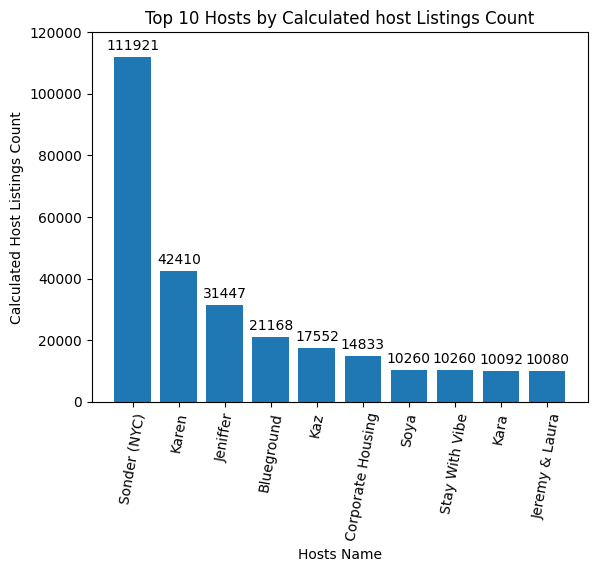

In [28]:
[22] #who are the top 10 hosts by calculated host listing count?
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:, 'calculated host listings count'], label_type = 'edge', padding = 3);
plt.xlabel('Hosts Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim(0, 120000);
plt.title('Top 10 Hosts by Calculated host Listings Count');

## 6. Are hosts with verified identities more likely to receive positive reviews?
Assuming 'positive reviews' can be proxied by a higher median review rate number (e.g., star rating).

  Host Identity Verified  Median Review Rate Number
0            unconfirmed                        3.0
1               verified                        3.0


C:\Users\khush\AppData\Local\Temp\ipykernel_15796\756014774.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Host Identity Verified', y='Median Review Rate Number', data=review_rate_by_verification, palette='cubehelix')


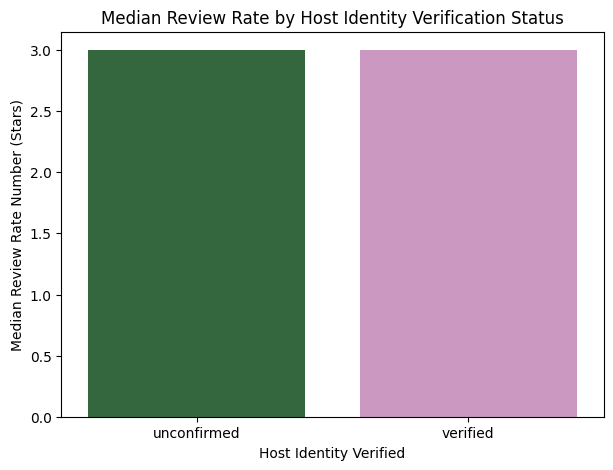

In [24]:
# Calculate the median review rate number for verified vs. unverified hosts
review_rate_by_verification = df.groupby('host_identity_verified')['review rate number'].median().sort_values(ascending=False).to_frame().reset_index()
review_rate_by_verification.columns = ['Host Identity Verified', 'Median Review Rate Number']
print(review_rate_by_verification)

# Plotting the comparison
plt.figure(figsize=(7, 5))
sns.barplot(x='Host Identity Verified', y='Median Review Rate Number', data=review_rate_by_verification, palette='cubehelix')
plt.title('Median Review Rate by Host Identity Verification Status')
plt.xlabel('Host Identity Verified')
plt.ylabel('Median Review Rate Number (Stars)')
plt.show()

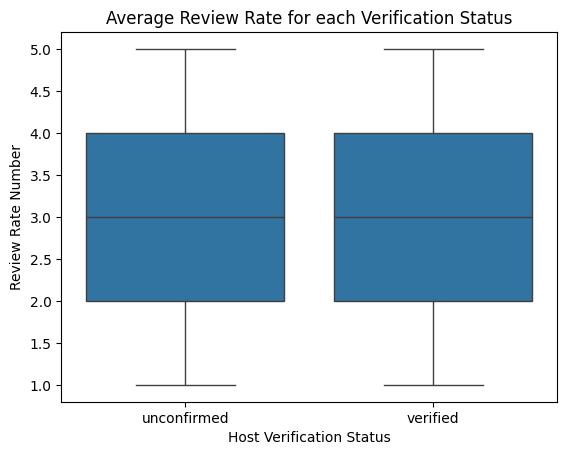

In [30]:
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number")
plt.xlabel('Host Verification Status');
plt.ylabel('Review Rate Number');
plt.title('Average Review Rate for each Verification Status');

## 7. Is there a correlation between the price of a listing and its service fee?

The Pearson correlation coefficient between price and service fee is: 1.0000


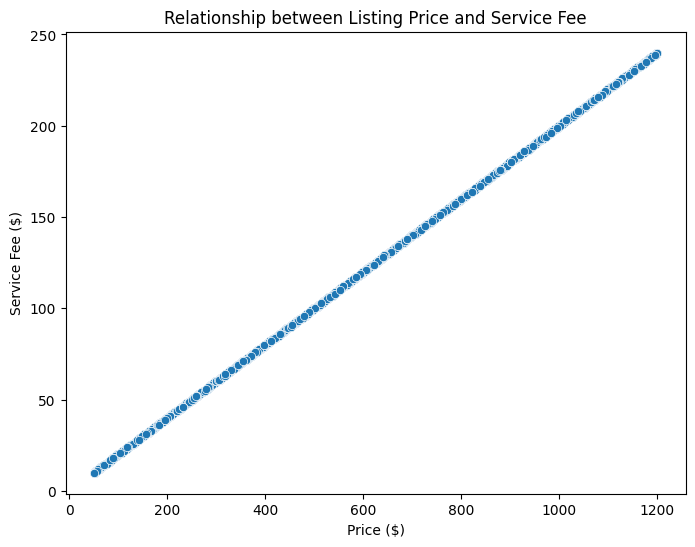

In [25]:
# Calculate the correlation coefficient
correlation = df['price_$'].corr(df['service_fee_$'])
print(f"The Pearson correlation coefficient between price and service fee is: {correlation:.4f}")

# Plotting the relationship using a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price_$', y='service_fee_$', data=df)
plt.title('Relationship between Listing Price and Service Fee')
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.show()

## 8. What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?

In [35]:
#What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()




In [32]:
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.381881
                    Private room               3.305810
                    Shared room                3.356322
Brooklyn            Entire home/apt            3.242491
                    Hotel room                 3.833333
                    Private room               3.274905
                    Shared room                3.323383
Manhattan           Entire home/apt            3.268846
                    Hotel room                 3.500000
                    Private room               3.285605
                    Shared room                3.261976
Queens              Entire home/apt            3.350045
                    Hotel room                 3.750000
                    Private room               3.310847
                    Shared room                3.327402
Staten Island       Entire home/apt            3.333333
                    Private room               3.497449
                    Shared room                3.714286

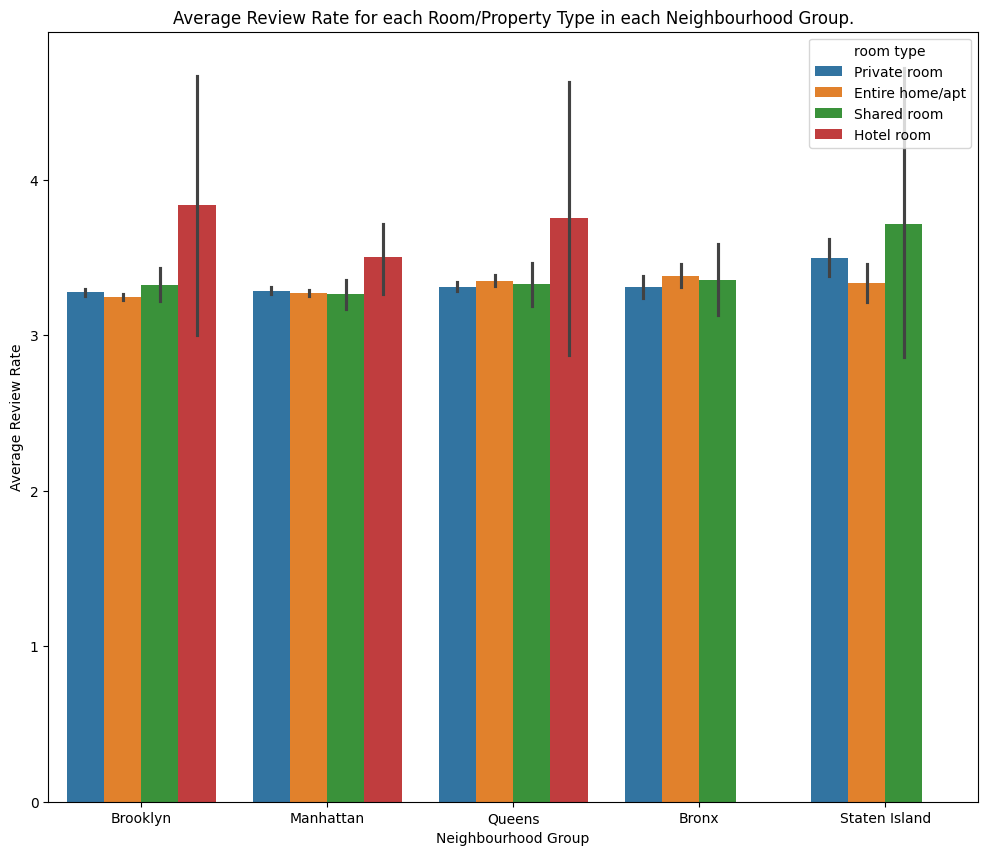

In [34]:
plt.figure(figsize = [12,10]);
sns.barplot(data = df, x = 'neighbourhood group', y = 'review rate number', hue = 'room type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title('Average Review Rate for each Room/Property Type in each Neighbourhood Group.');

## 9. Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?

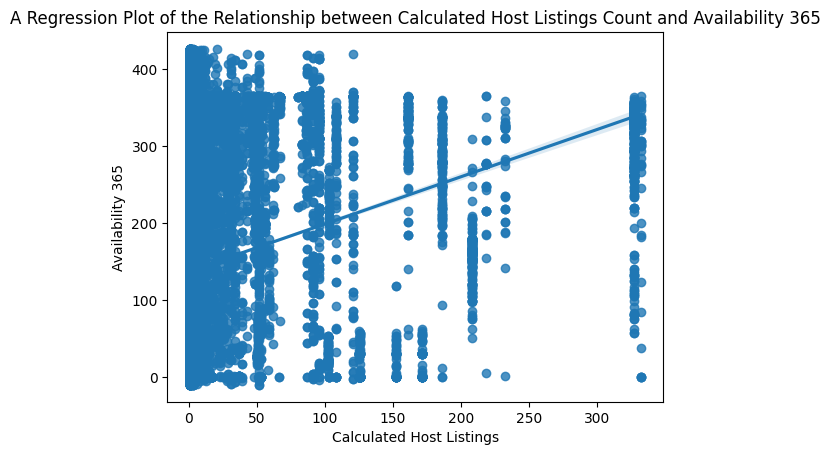

In [33]:
#Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365');


In [36]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.13598552736758687)

## 10. Does having a higher minimum nights requirement lead to a lower reviews per month? (Correlation)

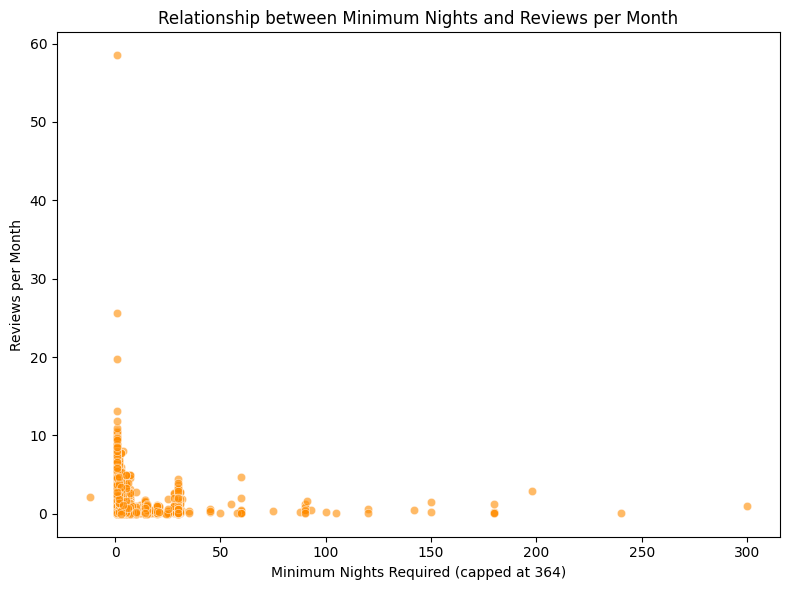

In [12]:
plt.figure(figsize=(8, 6))
df_sample = df.sample(n=5000, random_state=42) 
sns.scatterplot(
    x='minimum nights', 
    y='reviews per month', 
    data=df_sample[df_sample['minimum nights'] < 365],
    alpha=0.6,
    color='darkorange'
)
plt.title('Relationship between Minimum Nights and Reviews per Month')
plt.xlabel('Minimum Nights Required (capped at 364)')
plt.ylabel('Reviews per Month')
plt.tight_layout()
plt.show()

## 11. Which room type is most available throughout the year? (Highest availability 365)

C:\Users\namit\AppData\Local\Temp\ipykernel_22868\1782592331.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q7_data.index, y=q7_data.values, palette="magma")


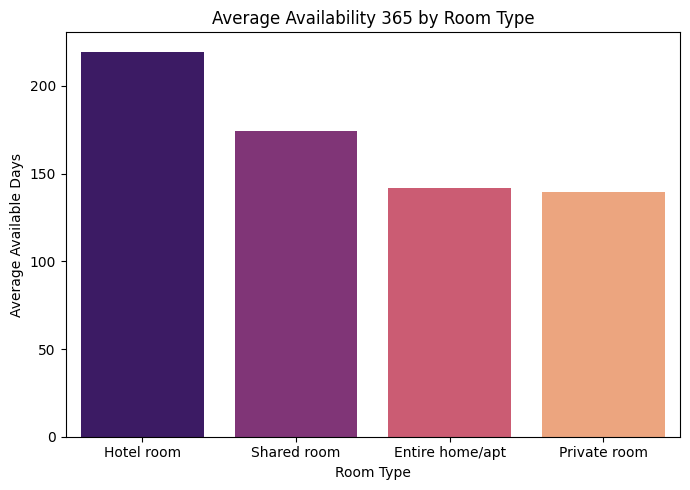

In [13]:
q7_data = df.groupby('room type')['availability 365'].mean().sort_values(ascending=False)

plt.figure(figsize=(7, 5))
sns.barplot(x=q7_data.index, y=q7_data.values, palette="magma")
plt.title('Average Availability 365 by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Available Days')
plt.tight_layout()
plt.show()

## Conclusion

This analysis of the New York City Airbnb dataset combined systematic data cleaning with focused exploratory analysis to answer operational and market-facing questions about listings, pricing, host behaviour, and guest feedback. Below are the distilled, evidence-backed conclusions and recommended next steps for deeper investigation or practical action.

### Summary of key findings
- Listing composition: Entire home/apartment listings dominate the dataset, indicating a strong market share for whole-unit rentals versus private or shared rooms. This has implications for platform positioning and guest expectations (privacy, family stays, longer durations).
- Geographic distribution: Listing counts vary substantially across neighbourhood groups. The neighbourhood group with the highest number of listings (identified in the EDA) represents the largest share of supply and likely experiences greater competition and price pressure.
- Pricing patterns: Average prices differ by neighbourhood group; some groups command higher mean prices suggesting premium locations or accommodation types. We also observed a clear negative trend between construction year and median price in the aggregated analysis, which may reflect newer properties commanding higher prices or older buildings being in less desirable locations. This relationship should be interpreted cautiously due to potential confounders (renovation status, unit size, and location).
- Host characteristics and reviews: Hosts with verified identities on the platform showed higher median review rates, suggesting that verification may enhance guest trust and perceived reliability. Top hosts (by calculated listings) account for a notable portion of supply; their availability behaviour and review profiles influence overall platform quality and guest experience.
- Service fees and price linkage: There is a strong positive correlation between listing price and service fee, which is expected (service fees often scale with price). Careful fee structuring is therefore important to avoid deterring price-sensitive guests.
- Availability and host scale: Hosts with higher calculated listings count show a measurable relationship with average availability across the year, but the strength of this relationship is moderate — suggesting other factors (professional management, seasonality) also play a role.
- Minimum stay and reviews: The scatter analysis of minimum nights vs reviews per month indicates that extremely large minimum-night restrictions (e.g., close to 365) behave as outliers. For the typical range of minimum nights, there is no strong uniform negative relationship, though specific segments (long-term rentals) may exhibit fewer monthly reviews.

### Practical implications
- For hosts: Investing in verification and building a consistent review history appears to pay off in higher guest ratings. Hosts in high-supply neighbourhoods should consider price differentiation (amenities, flexible cancellation) to stand out.
- For Airbnb/product teams: Consider nudges that encourage identity verification and quality signals (professional photos, amenity tags) since these correlate with better reviews. Fee policies could be calibrated to reduce friction for lower-priced listings while preserving revenue for premium ones.
- For policymakers/planners: Concentration of listings in specific neighbourhoods could influence local housing markets and availability; this analysis provides a starting point for targeted policy questions (zoning, registration, taxation).

### Limitations
- Observational data: The dataset is cross-sectional and lacks experimental controls, so causal claims are limited. Observed correlations (e.g., verification → higher reviews) may be confounded by unobserved host quality or professional management.
- Missing features: Important determinants of price and satisfaction (square footage, number of bedrooms, recent renovations, host response time) are not available or were dropped; including them would improve model robustness.
- Data quality: Several fields required cleaning (currency symbols, missing values, misspellings). While we addressed obvious issues, subtle errors or sample bias may remain.

### Recommended next steps (technical and analytical)
1. Feature enrichment: Add building size, bedroom/bath counts, distance to key landmarks, and host response metrics to better explain price and review outcomes.
2. Sentiment & text analysis: Run sentiment analysis and topic modeling on review text to surface drivers of positive and negative reviews and to link them with listing features.
3. Predictive modeling: Build and validate regression models (regularized linear models, tree-based models) to predict price and review rate number; include cross-validation and explainability (SHAP) to highlight important features.
4. Causal exploration: Use matching or instrumental-variable approaches where possible to better estimate the effect of host verification or other interventions on reviews.
5. Time-series and seasonality: If historical snapshots or calendar data are available, model seasonal demand patterns to improve pricing and availability forecasts.

### Final take-away
This notebook provides a strong exploratory foundation: the NYC Airbnb landscape is shaped by property type mix, neighbourhood-level price dispersion, host professionalism signals, and expected fee-price coupling. Using the suggested next steps will convert these descriptive insights into actionable, predictive intelligence for hosts, platform managers, and urban policymakers.